In [1]:
! curl -O 'https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW4_fb55/getCitiBikeCSV.py'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
103  2282  103  2282    0     0  13045      0 --:--:-- --:--:-- --:--:-- 67117


In [153]:
import pylab as pl
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline
import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline
if os.getenv('PUI2016') is None:
    print("must")
if os.getenv('PUIDATA') is None:
    print("must")
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [154]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [155]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [156]:
df['age'] = 2015 - df['birth year']

In [157]:
df.head()
type(df)

pandas.core.frame.DataFrame

In [158]:
df['freq'] = df.groupby('age')['age'].transform('count')
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,freq
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,55.0,4901.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,52.0,6119.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,41.0,7514.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,46.0,7438.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,38.0,7728.0
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969.0,2,46.0,7438.0
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972.0,1,43.0,6714.0
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985.0,2,30.0,10402.0
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991.0,1,24.0,4927.0
9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991.0,1,24.0,4927.0


In [159]:
df.drop_duplicates('age')


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,freq
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,55.0,4901.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,52.0,6119.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,41.0,7514.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,46.0,7438.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,38.0,7728.0
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972.0,1,43.0,6714.0
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985.0,2,30.0,10402.0
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991.0,1,24.0,4927.0
10,540,1/1/2015 0:10,1/1/2015 0:19,291,Madison St & Montgomery St,40.713126,-73.984844,151,Cleveland Pl & Spring St,40.721816,-73.997203,16947,Subscriber,1979.0,1,36.0,8308.0
11,419,1/1/2015 0:11,1/1/2015 0:18,517,Pershing Square South,40.751581,-73.977910,540,Lexington Ave & E 26 St,40.741473,-73.983209,14807,Subscriber,1980.0,1,35.0,8877.0


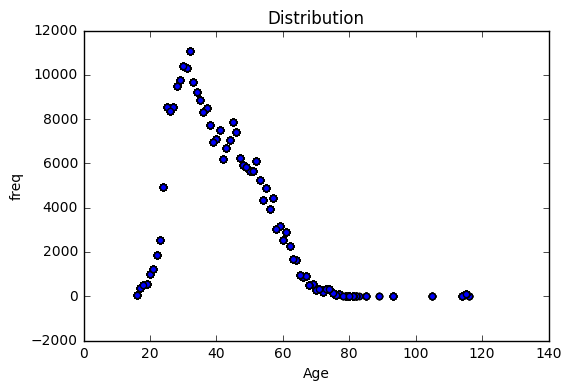

In [160]:
pl.scatter(df.age,df.freq)
pl.title('Distribution')
pl.ylabel('freq')
pl.xlabel('Age')

pl.show()

            Figure: the graph skewed left, however is belly shape.

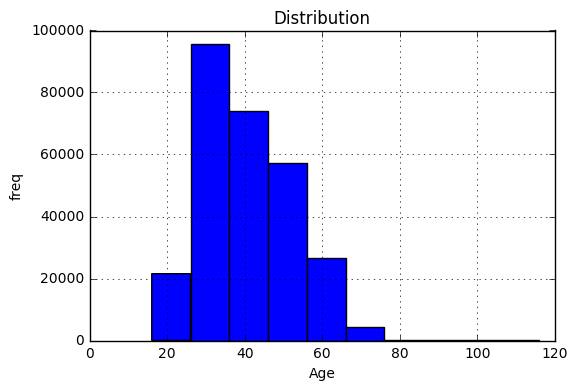

In [140]:
df['age'].hist()
pl.title('Distribution')
pl.ylabel('freq')
pl.xlabel('Age')


              Figure: the graph skewed left, however is belly shape.

In [109]:
lm = smf.ols(formula='age ~ freq', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 2.191e+05
Date:                Mon, 10 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:48:51   Log-Likelihood:            -1.0018e+06
No. Observations:              279924   AIC:                         2.004e+06
Df Residuals:                  279922   BIC:                         2.004e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     61.5986      0.049   1260.507      0.0

In [110]:
#pl.plot(df.age, df.freq, lm.predict(),'r-')
#pl.show()

In [111]:
from scipy.stats import norm

In [161]:

hmean = np.mean((df['age']))
hmean

40.048581043426076

In [162]:
import scipy.stats as stats
#import math

h = np.sort(df['age'].values)
print(h)

[ 16.  16.  16. ...,  nan  nan  nan]


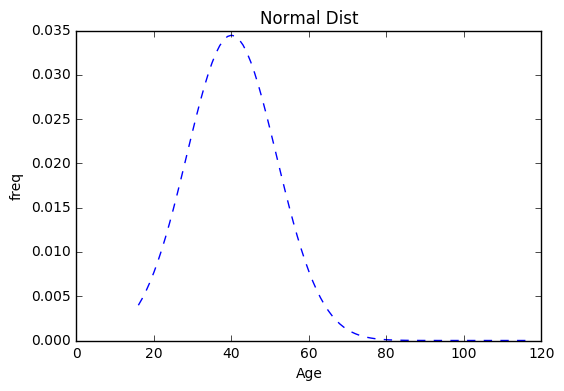

In [163]:
hmean = np.mean((df['age']))
hstd = np.std(df['age'])
pdf = stats.norm.pdf(h, hmean, hstd)

#df['age'].hist()
pl.plot( h, pdf, '--')
pl.title('Normal Dist')
pl.ylabel('freq')
pl.xlabel('Age')

In [129]:
df['age'].dropna(inplace= True)

Null Hypothesis: 
The distribution of our sample for citibike rider age, in jan 2015, is normal(Guassion).


Alternative Hypo: 
The distribution of our sample for citibike rider age, in jan 2015, isn't normal(Guassion).

Significant level = 0.05

In [142]:
from scipy.stats import kstest


In [143]:
stats.kstest(df['age'],'norm',( hmean, hstd))

KstestResult(statistic=0.087552395335024624, pvalue=0.0)

As our pvalue is equal to 0 and less than sig level(0.05), we reject the Null; the distribution is not normal.

In [144]:
stats.anderson(df['age'], dist='norm')

AndersonResult(statistic=2732.9753468561685, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

we reject the null hypo because statistics(A2) is larger than the critique value(.787) correspondent to our significant level(0.05) .

In [119]:
#stats.chisquare(df['age'], test_norm)

In [120]:
#test_norm = hstd*np.random.randn(np.size(df.age))+ hmean

In [121]:
#test_num = np.random.logistic(fmean, np.sqrt(3*fstd/pi**2), numpy.size(df['freq']))

In [122]:
#stats.chisquare(df['freq'], test_num)

In [124]:
#fmean = np.mean((df['freq']))
#3fstd = np.std(df['freq'])
#pdf = stats.norm.pdf(h, hmean, hstd)
#pl.plot( h, pdf, 'o-')

Null Hypothesis: 
The distribution of our sample for citibike rider age, in jan 2015, is logistic.


Alternative Hypo: 
The distribution of our sample for citibike rider age, in jan 2015, isn't logistic.

Significant level = 0.05

In [149]:
stats.kstest(df['age'],'logistic',( hmean, hstd))

KstestResult(statistic=0.17107906457772712, pvalue=0.0)

As our pvalue is equal to 0 and less than sig level(0.05), we reject the Null; the distribution is not logistic.

In [126]:
stats.anderson(df['age'], dist='logistic')

AndersonResult(statistic=2893.1871237001615, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

we reject the null hypo because statistics(A2) is larger than the critique value(0.66) correspondent to our significant level(0.05) .

In [164]:
stats.anderson?